In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
x_ = df.drop(['Salary', 'League','Division','NewLeague'],axis = 1).astype("float64")
x = pd.concat([x_, dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33,random_state = 42)

In [3]:
x_train = pd.DataFrame(x_train["Hits"])
x_test = pd.DataFrame(x_test["Hits"])

In [4]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=3)

In [5]:
cart_model.fit(x_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 32.    32.01  32.02 ... 237.97 237.98 237.99].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

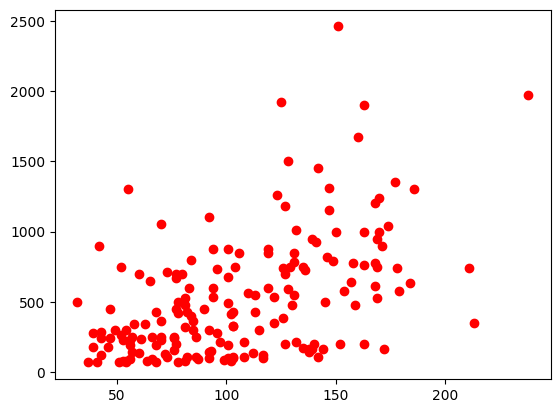

In [6]:
x_grid = np.arange(min(np.array(x_train)),max(np.array(x_train)),0.01)
x_grid = x_grid.reshape((len(x_grid)))

plt.scatter(x_train, y_train, color = 'red')

plt.plot(x_grid, cart_model.predict(x_grid), color = "blue")

plt.title("CART REGRESSİON TREE")
plt.xlabel("Atış Sayısı(Hit)")
plt.ylabel("Maaş (Salary)")

In [7]:
cart_model.predict(x_test)[0:5]

array([783.86133824, 783.86133824, 783.86133824, 347.27414953,
       347.27414953])

In [8]:
y_pred = cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred)) # tek değişken

458.51525679130316

In [9]:
# Tüm değişkenler
df = pd.read_csv("hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
x_ = df.drop(['Salary', 'League','Division','NewLeague'],axis = 1).astype("float64")
x = pd.concat([x_, dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33,random_state = 42)

In [10]:
cart_model = DecisionTreeRegressor().fit(x_train,y_train)

In [11]:
y_pred = cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

508.5059142256231

# MODEL TUNING

In [23]:
cart_model = DecisionTreeRegressor(max_depth=2).fit(x_train,y_train)
y_pred = cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

409.9750612549715

In [24]:
cart_params= {"max_depth": [2,3,4,5,12,20],
             "min_samples_split":[2,10,5,30,50,10]}

In [25]:
cart_model = DecisionTreeRegressor()

In [26]:
cart_cv_model= GridSearchCV(cart_model, cart_params, cv=10).fit(x_train,y_train)

In [27]:
cart_cv_model.best_params_

{'max_depth': 20, 'min_samples_split': 30}

In [28]:
# final model

In [31]:
cart_model = DecisionTreeRegressor(max_depth= 2,min_samples_split= 30).fit(x_train,y_train)

In [32]:
y_pred = cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

409.9750612549714